In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from tqdm import tqdm
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
import os

In [5]:
IMG_WIDTH = 512
IMG_HEIGHT = 512
TRAIN_PATH = 'E:/OurData/slice/'
TRAIN_MASK = 'E:/OurData/lungmask/'
X_train = []
Y_train = []
a = os.listdir(TRAIN_PATH)
b = os.listdir(TRAIN_MASK)
a.sort(key=lambda x:int(x[7:-5]))
#print(a)
b.sort(key=lambda x:int(x[10:-5]))
#print(b)
sys.stdout.flush()
for i in tqdm(a):
    img = imread(TRAIN_PATH + i)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH, 1),mode='constant', preserve_range=True)
    X_train.append(img)
for n in tqdm(b):
    mask = imread(TRAIN_MASK + n)
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1),mode='constant', preserve_range=True)
    Y_train.append(mask)
X_train = np.array(X_train,dtype=np.uint8)
Y_train = np.array(Y_train,dtype=np.bool)

100%|██████████████████████████████████████████████████████████████████████████████| 1827/1827 [00:37<00:00, 48.53it/s]


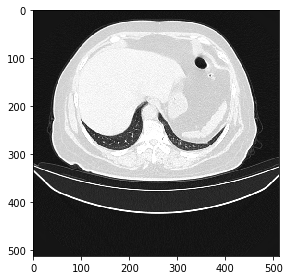

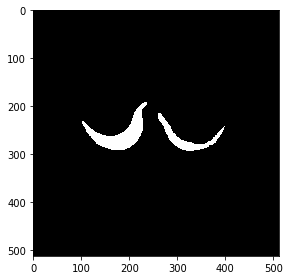

In [6]:
imshow(X_train[0])
plt.show()
imshow(Y_train[0])
plt.show()

In [ ]:
for ix in range(0,len(X_train)):
    imag = np.multiply(X_train[ix],Y_train[ix])
    imag = imag.squeeze(axis=2)
    #imshow(imag)
    imag.shape
    im.imsave('E:/OurData/lung/lung('+str(ix)+').png',imag,cmap='gray')